## First Session

---------------


## Introduction to [Deep Graph Library (DGL)](https://docs.dgl.ai/index.html) for the graduate course "[Graph Machine learning](https://github.com/zahta/graph_ml)"
##### by [Zahra Taheri](https://github.com/zahta), 09 May 2023

---------------

### This Tutorial Is Prepared Based on the Following References

- [A Blitz Introduction to DGL](https://docs.dgl.ai/en/latest/tutorials/blitz/index.html)
  
- [User Guide](https://docs.dgl.ai/en/latest/guide/index.html#)
    - Chapter 1: Graph
    - Chapter 2: Message Passing
    - Chapter 3: Building GNN Modules
    - Chapter 4: Graph Data Pipeline
    - Chapter 5: Training Graph Neural Networks
    - Chapter 6: Stochastic Training on Large Graphs
    - Chapter 7: Distributed Training
    - Chapter 8: Mixed Precision Training

----------------

### [Get Started](https://www.dgl.ai/pages/start.html)

#### System Requirements

**Supported OS:**

All Linux distributions no earlier than CentOS 7+ / Ubuntu 18.04.

macOS X 10.9+

Windows 10+ (with VC2015 Redistributable Installed) / Windows server 2016+

Supported Python versions: 3.6, 3.7, 3.8, 3.9, 3.10, 3.11

**Supported deep learning frameworks:**

PyTorch 1.12.0+

Apache MXNet 1.6+

TensorFlow 2.3+.

#### Installation

**With Conda (without cuda):**

conda install -c dglteam dgl

**With pip (without cuda):**

pip install  dgl -f https://data.dgl.ai/wheels/repo.html

pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

----------------------------------

In [1]:
%matplotlib inline
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import numpy as np
import networkx as nx
import torch
import torch.nn as nn


How Does DGL Represent A Graph?
===============================

 <img src="/home/zahra/graph_ml/images/graph.png" alt="app-screen" width="300" />

By the end of this tutorial you will be able to:

-  Construct a graph in DGL from scratch.
-  Assign node and edge features to a graph.
-  Query properties of a DGL graph such as node degrees and
   connectivity.
-  Transform a DGL graph into another graph.
-  Load and save DGL graphs.


DGL Graph Construction
----------------------

DGL represents a directed graph as a ``DGLGraph`` object. You can
construct a graph by specifying the number of nodes in the graph as well
as the list of source and destination nodes.  Nodes in the graph have
consecutive IDs starting from 0.



For instance, the following code constructs a directed star graph with 5
leaves. The center node's ID is 0. The edges go from the
center node to the leaves.

In [4]:
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]), num_nodes=6)
# Equivalently, PyTorch LongTensors also work.
g = dgl.graph(
    (torch.LongTensor([0, 0, 0, 0, 0]), torch.LongTensor([1, 2, 3, 4, 5])),
    num_nodes=6,
)

# You can omit the number of nodes argument if you can tell the number of nodes from the edge list alone.
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]))

Edges in the graph have consecutive IDs starting from 0, and are
in the same order as the list of source and destination nodes during
creation.




In [3]:
# Print the source and destination nodes of every edge.
print(g.edges())

(tensor([0, 0, 0, 0, 0]), tensor([1, 2, 3, 4, 5]))


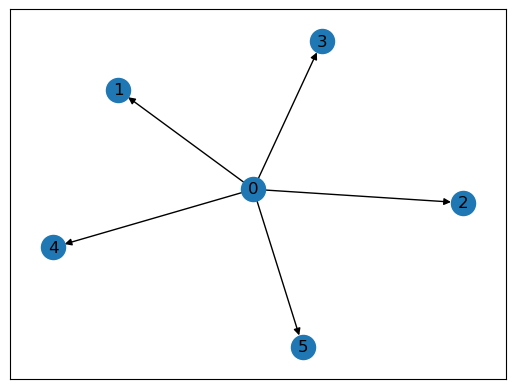

In [4]:
nx.draw_networkx(g.to_networkx(), with_labels = True)

In [5]:
# Node IDs
print(g.nodes())

tensor([0, 1, 2, 3, 4, 5])


In [6]:
# endpoints of the edges
print(g.edges())

(tensor([0, 0, 0, 0, 0]), tensor([1, 2, 3, 4, 5]))


In [7]:
g.edges()[0]

tensor([0, 0, 0, 0, 0])

In [8]:
# defining a graph with 5 nodes and some given edges

src_ids = [1,2,3]
dst_ids = [4,0,1]
g = dgl.graph((src_ids, dst_ids))
print(g.nodes()) 

tensor([0, 1, 2, 3, 4])


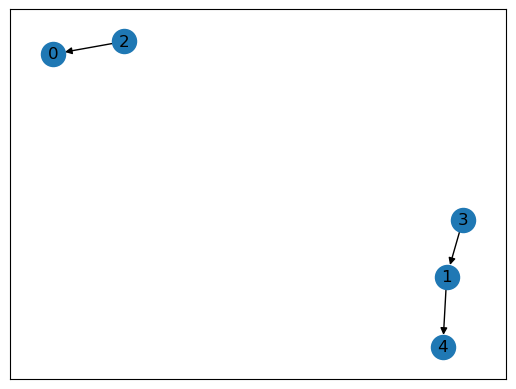

In [9]:
nx.draw_networkx(g.to_networkx(), with_labels = True)

In [10]:
# defining a graph with 6 nodes and the previous given edges (with an isolated node)

g = dgl.graph((src_ids, dst_ids), num_nodes=6)
print(g.nodes())

tensor([0, 1, 2, 3, 4, 5])


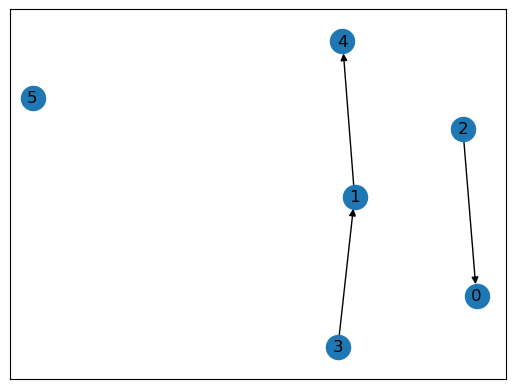

In [11]:
nx.draw_networkx(g.to_networkx(), with_labels = True)

##### Extract information of edges

In [12]:
print(g.edges())

(tensor([1, 2, 3]), tensor([4, 0, 1]))


In [13]:
print(g.edges("uv"))

(tensor([1, 2, 3]), tensor([4, 0, 1]))


In [14]:
print(g.edges("all"))

(tensor([1, 2, 3]), tensor([4, 0, 1]), tensor([0, 1, 2]))


In [15]:
print(g.edges("eid"))

tensor([0, 1, 2])


In [16]:
# find ID of a valid edge, e.g., 2->0
g.edge_ids(2, 0)

1

In [17]:
# find IDs of some valid edges, e.g., (2->0 and 1->4)
g.edge_ids(torch.tensor([2, 1]), torch.tensor([0, 4]))

tensor([1, 0])

In [18]:
# find IDs of some valid edges, e.g., (2->0 and 1->4)
g.edge_ids([2, 1],[0, 4])

tensor([1, 0])

In [19]:
# Returns the source and destination node ID given the edge ID(s).
g.find_edges(0)

(tensor([1]), tensor([4]))

In [20]:
g.find_edges([0, 1])

(tensor([1, 2]), tensor([4, 0]))

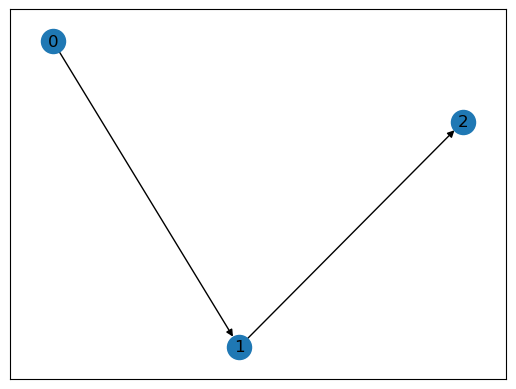

In [21]:
g = dgl.graph((torch.tensor([0, 1]), torch.tensor([1, 2])))
nx.draw_networkx(g.to_networkx(), with_labels = True)

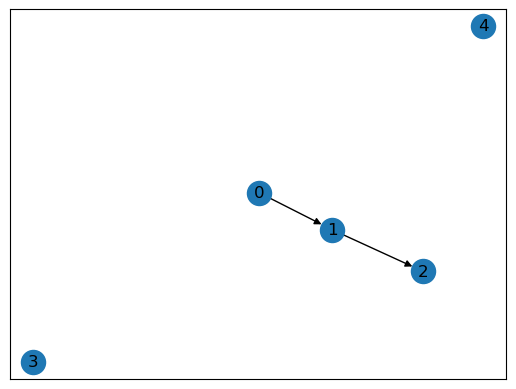

In [22]:
g = dgl.add_nodes(g, 2)
nx.draw_networkx(g.to_networkx(), with_labels = True)

In [23]:
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]), num_nodes=6)
# Equivalently, PyTorch LongTensors also work.
g = dgl.graph(
    (torch.LongTensor([0, 0, 0, 0, 0]), torch.LongTensor([1, 2, 3, 4, 5])),
    num_nodes=6,
)

# You can omit the number of nodes argument if you can tell the number of nodes from the edge list alone.
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]))

<div class="alert alert-info"><h4>Note</h4><p>``DGLGraph``'s are always directed to best fit the computation
   pattern of graph neural networks, where the messages sent
   from one node to the other are often different between both
   directions. If you want to handle undirected graphs, you may consider
   treating it as a bidirectional graph. See `Graph
   Transformations`_ for an example of making
   a bidirectional graph.</p></div>




Assigning Node and Edge Features to Graph
-----------------------------------------

Many graph data contain attributes on nodes and edges.
Although the types of node and edge attributes can be arbitrary in real
world, ``DGLGraph`` only accepts attributes stored in tensors (with
numerical contents). Consequently, an attribute of all the nodes or
edges must have the same shape. In the context of deep learning, those
attributes are often called *features*.

You can assign and retrieve node and edge features via ``ndata`` and
``edata`` interface.




In [24]:
# Assign a 3-dimensional node feature vector for each node.
g.ndata["x"] = torch.randn(6, 3)
# Assign a 4-dimensional edge feature vector for each edge.
g.edata["a"] = torch.randn(5, 4)
# Assign a 5x4 node feature matrix for each node.  Node and edge features in DGL can be multi-dimensional.
g.ndata["y"] = torch.randn(6, 5, 4)

print(g.ndata["x"])

tensor([[ 0.3328,  0.1273,  0.6627],
        [ 0.8486, -0.1740,  0.2334],
        [-0.9223,  1.4907,  1.3930],
        [-1.1703,  0.5329, -2.1613],
        [-0.5782,  0.8484,  0.6940],
        [ 0.9306, -0.0957,  0.4226]])


In [25]:
print(g)

Graph(num_nodes=6, num_edges=5,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5, 4), dtype=torch.float32)}
      edata_schemes={'a': Scheme(shape=(4,), dtype=torch.float32)})


In [26]:
g.ndata['h'] = torch.ones(6, 1)
g.ndata['h']

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [27]:
print(g)

Graph(num_nodes=6, num_edges=5,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5, 4), dtype=torch.float32), 'h': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'a': Scheme(shape=(4,), dtype=torch.float32)})


In [28]:
g = dgl.add_nodes(g, 1)
g.ndata['h']

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]])

In [29]:
print(g)

Graph(num_nodes=7, num_edges=5,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5, 4), dtype=torch.float32), 'h': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'a': Scheme(shape=(4,), dtype=torch.float32)})


In [30]:
# Adds a learnable embeddings for all nodes
embed = nn.Embedding(7, 2)
g.ndata['feat'] = embed.weight
g.ndata['feat']

Parameter containing:
tensor([[ 1.1241, -0.4887],
        [-0.5212, -0.1095],
        [-0.3391,  0.1524],
        [-0.5107,  0.6816],
        [-0.3469,  0.7854],
        [-0.0444,  2.3621],
        [ 0.2611,  0.1389]], requires_grad=True)

In [31]:
# print node 2's input feature
print(g.ndata['feat'][2])

tensor([-0.3391,  0.1524], grad_fn=<SelectBackward0>)


In [32]:
# print out node 2 and 4's input features
print(g.ndata['feat'][[2, 4]])

tensor([[-0.3391,  0.1524],
        [-0.3469,  0.7854]], grad_fn=<IndexBackward0>)


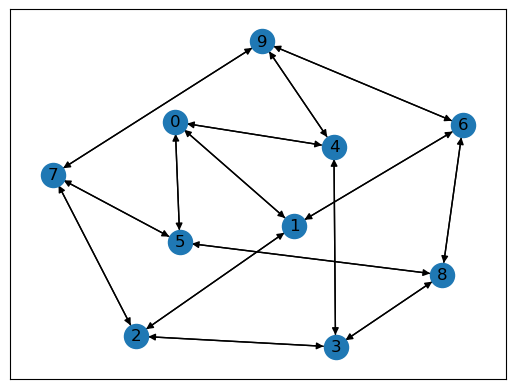

In [33]:
g_nx = nx.petersen_graph()
g = dgl.from_networkx(g_nx)
nx.draw_networkx(g.to_networkx(), with_labels = True)

In [34]:
x = torch.randn(10, 3)
g.ndata['x'] = x
g.ndata

{'x': tensor([[-2.3983,  0.1163, -0.1424],
        [-1.1349,  0.0931,  2.3760],
        [ 0.1112,  0.9053, -0.2729],
        [ 0.6420,  1.6896,  0.8604],
        [ 0.1054, -0.6259, -0.3428],
        [ 0.1819, -0.4596,  0.4474],
        [ 0.1540, -0.4012, -1.0414],
        [-0.0559, -0.9912, -2.0168],
        [ 0.3794,  1.0251, -1.1173],
        [ 1.2346,  1.1826, -0.3397]])}

In [35]:
g.ndata['x'][0] = torch.zeros(1, 3)
g.ndata['x'][[0, 1, 2]] = torch.zeros(3, 3)
# g.ndata['x'][torch.tensor([0, 1, 2])] = torch.randn(3, 3)

In [36]:
g.ndata['x']

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.6420,  1.6896,  0.8604],
        [ 0.1054, -0.6259, -0.3428],
        [ 0.1819, -0.4596,  0.4474],
        [ 0.1540, -0.4012, -1.0414],
        [-0.0559, -0.9912, -2.0168],
        [ 0.3794,  1.0251, -1.1173],
        [ 1.2346,  1.1826, -0.3397]])

Assigning edge features is similar to that of node features, except that you can also do it by specifying endpoints of the edges.

In [37]:
g.edata['w'] = torch.randn(30, 2)
g.edata

{'w': tensor([[-0.5233, -0.6827],
        [ 0.3240,  0.4518],
        [ 2.0616, -0.2406],
        [ 1.8011, -1.3334],
        [-0.4116, -0.2241],
        [ 1.4575, -0.0999],
        [-2.1754, -0.9719],
        [ 0.3565, -0.1400],
        [-0.5080, -1.4082],
        [ 1.1300,  0.5195],
        [-0.1703,  1.6730],
        [ 0.3069,  0.5121],
        [ 0.1209,  1.5571],
        [ 0.3910, -0.5565],
        [ 0.1812, -0.5736],
        [-1.0830, -0.0474],
        [-0.0098, -0.6067],
        [ 1.5420,  1.6262],
        [ 1.4072,  0.7159],
        [ 1.0366, -0.5645],
        [-1.3820, -1.6408],
        [ 0.6382,  0.3101],
        [ 0.3830,  0.0973],
        [-1.3659, -0.2355],
        [-0.1441, -2.0269],
        [ 0.3167,  1.4210],
        [ 1.3409, -0.6139],
        [ 0.9098, -0.9694],
        [-0.1639, -0.5650],
        [-0.0430,  0.7084]])}

In [38]:
# Access edge set with IDs in integer, list, or integer tensor
g.edata['w'][1] = torch.randn(1, 2)
g.edata['w'][[0, 1, 2]] = torch.zeros(3, 2)
g.edata['w'][torch.tensor([0, 1, 2])] = torch.zeros(3, 2)

In [39]:
# You can get the edge ids by giving endpoints, which are useful for accessing the features.
g.edata['w'][g.edge_ids(8, 5)] = torch.zeros(1, 2)   

In [40]:
g.edata['w']

tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 1.8011, -1.3334],
        [-0.4116, -0.2241],
        [ 1.4575, -0.0999],
        [-2.1754, -0.9719],
        [ 0.3565, -0.1400],
        [-0.5080, -1.4082],
        [ 1.1300,  0.5195],
        [-0.1703,  1.6730],
        [ 0.3069,  0.5121],
        [ 0.1209,  1.5571],
        [ 0.3910, -0.5565],
        [ 0.1812, -0.5736],
        [-1.0830, -0.0474],
        [-0.0098, -0.6067],
        [ 1.5420,  1.6262],
        [ 1.4072,  0.7159],
        [ 1.0366, -0.5645],
        [-1.3820, -1.6408],
        [ 0.6382,  0.3101],
        [ 0.3830,  0.0973],
        [-1.3659, -0.2355],
        [-0.1441, -2.0269],
        [ 0.0000,  0.0000],
        [ 1.3409, -0.6139],
        [ 0.9098, -0.9694],
        [-0.1639, -0.5650],
        [-0.0430,  0.7084]])

You can also remove node or edge states from the graph. This is particularly useful to save memory during inference.



In [41]:
g.ndata.pop('x')
g.edata.pop('w')
g.ndata

{}

<div class="alert alert-info"><h4>Note</h4><p>The vast development of deep learning has provided us many
   ways to encode various types of attributes into numerical features.
   Here are some general suggestions:

   -  For categorical attributes (e.g. gender, occupation), consider
      converting them to integers or one-hot encoding.
   -  For variable length string contents (e.g. news article, quote),
      consider applying a language model.
   -  For images, consider applying a vision model such as CNNs.

   You can find plenty of materials on how to encode such attributes
   into a tensor in the `PyTorch Deep Learning
   Tutorials <https://pytorch.org/tutorials/>`__.</p></div>




Querying Graph Structures
-------------------------

``DGLGraph`` object provides various methods to query a graph structure.




In [42]:
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]), num_nodes=6)
# Equivalently, PyTorch LongTensors also work.
g = dgl.graph(
    (torch.LongTensor([0, 0, 0, 0, 0]), torch.LongTensor([1, 2, 3, 4, 5])),
    num_nodes=6,
)

# You can omit the number of nodes argument if you can tell the number of nodes from the edge list alone.
g = dgl.graph(([0, 0, 0, 0, 0], [1, 2, 3, 4, 5]))

In [43]:
# Assign a 3-dimensional node feature vector for each node.
g.ndata["x"] = torch.randn(6, 3)
# Assign a 4-dimensional edge feature vector for each edge.
g.edata["a"] = torch.randn(5, 4)
# Assign a 5x4 node feature matrix for each node.  Node and edge features in DGL can be multi-dimensional.
g.ndata["y"] = torch.randn(6, 5, 4)

print(g.ndata["x"])

tensor([[-1.0238,  1.2493, -0.2539],
        [-1.7649,  0.1555, -1.2498],
        [-1.4226, -0.2141, -0.1454],
        [ 1.3658,  0.9208,  0.3963],
        [-0.9183,  1.0247, -0.2859],
        [ 0.1070, -0.1006,  0.2359]])


In [44]:
print(g.num_nodes())
print(g.num_edges())
# Out degrees of the center node
print(g.out_degrees(0))
# In degrees of the center node - note that the graph is directed so the in degree should be 0.
print(g.in_degrees(0))

6
5
5
0


Graph Transformations
---------------------




DGL provides many APIs to transform a graph to another such as
extracting a subgraph:




In [45]:
# Induce a subgraph from node 0, node 1 and node 3 from the original graph.
sg1 = g.subgraph([0, 1, 3])
# Induce a subgraph from edge 0, edge 1 and edge 3 from the original graph.
sg2 = g.edge_subgraph([0, 1, 3])

You can obtain the node/edge mapping from the subgraph to the original
graph by looking into the node feature ``dgl.NID`` or edge feature
``dgl.EID`` in the new graph.




In [46]:
# The original IDs of each node in sg1
print(sg1.ndata[dgl.NID])
# The original IDs of each edge in sg1
print(sg1.edata[dgl.EID])
# The original IDs of each node in sg2
print(sg2.ndata[dgl.NID])
# The original IDs of each edge in sg2
print(sg2.edata[dgl.EID])

tensor([0, 1, 3])
tensor([0, 2])
tensor([0, 1, 2, 4])
tensor([0, 1, 3])


``subgraph`` and ``edge_subgraph`` also copies the original features
to the subgraph:




In [47]:
# The original node feature of each node in sg1
print(sg1.ndata["x"])
# The original edge feature of each node in sg1
print(sg1.edata["a"])
# The original node feature of each node in sg2
print(sg2.ndata["x"])
# The original edge feature of each node in sg2
print(sg2.edata["a"])

tensor([[-1.0238,  1.2493, -0.2539],
        [-1.7649,  0.1555, -1.2498],
        [ 1.3658,  0.9208,  0.3963]])
tensor([[ 1.8629,  0.3587, -0.2901,  0.7310],
        [ 0.6382, -0.8732, -0.6088,  0.9154]])
tensor([[-1.0238,  1.2493, -0.2539],
        [-1.7649,  0.1555, -1.2498],
        [-1.4226, -0.2141, -0.1454],
        [-0.9183,  1.0247, -0.2859]])
tensor([[ 1.8629,  0.3587, -0.2901,  0.7310],
        [ 1.1017, -0.7278, -0.5077,  0.6895],
        [ 0.3403, -0.6723,  0.4547, -0.0252]])


Another common transformation is to add a reverse edge for each edge in
the original graph with ``dgl.add_reverse_edges``.

<div class="alert alert-info"><h4>Note</h4><p>If you have an undirected graph, it is better to convert it
   into a bidirectional graph first via adding reverse edges.</p></div>




In [48]:
newg = dgl.add_reverse_edges(g)
print(newg.edges())

(tensor([0, 0, 0, 0, 0, 1, 2, 3, 4, 5]), tensor([1, 2, 3, 4, 5, 0, 0, 0, 0, 0]))


Loading and Saving Graphs
-------------------------

You can save a graph or a list of graphs via ``dgl.save_graphs`` and
load them back with ``dgl.load_graphs``.




In [49]:
# Save graphs
dgl.save_graphs("graph.dgl", g)
dgl.save_graphs("graphs.dgl", [g, sg1, sg2])

# Load graphs
(g,), _ = dgl.load_graphs("graph.dgl")
print(g)
(g, sg1, sg2), _ = dgl.load_graphs("graphs.dgl")
print(g)
print(sg1)
print(sg2)

Graph(num_nodes=6, num_edges=5,
      ndata_schemes={'y': Scheme(shape=(5, 4), dtype=torch.float32), 'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'a': Scheme(shape=(4,), dtype=torch.float32)})
Graph(num_nodes=6, num_edges=5,
      ndata_schemes={'y': Scheme(shape=(5, 4), dtype=torch.float32), 'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'a': Scheme(shape=(4,), dtype=torch.float32)})
Graph(num_nodes=3, num_edges=2,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'y': Scheme(shape=(5, 4), dtype=torch.float32), 'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'a': Scheme(shape=(4,), dtype=torch.float32)})
Graph(num_nodes=4, num_edges=3,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'y': Scheme(shape=(5, 4), dtype=torch.float32), 'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), 'a': Scheme

What’s next?
------------

-  See [here](https://docs.dgl.ai/api/python/dgl.DGLGraph.html#apigraph-querying-graph-structure) for a list of graph structure query APIs.
-  See [here](https://docs.dgl.ai/api/python/dgl.html#api-subgraph-extraction) for a list of subgraph extraction routines.
-  See [here](https://docs.dgl.ai/api/python/dgl.html#api-transform) for a list of graph transformation routines.
-  API reference of [dgl.save_graphs](https://docs.dgl.ai/generated/dgl.save_graphs.html#dgl.save_graphs) and [dgl.load_graphs](https://docs.dgl.ai/generated/dgl.load_graphs.html#dgl.load_graphs)